Sample Data:
   HouseAge  Bedrooms  Bathrooms  SquareFeet   LotSize  Floors  Garage  \
0        52         3          3        3823  0.518613       2       1   
1        93         5          2        3642  0.127450       2       1   
2        15         1          3        3267  0.433098       2       0   
3        72         5          3        2835  0.259533       1       1   
4        61         4          2        1721  0.447480       2       0   

           Price  
0  494925.830038  
1  453780.543374  
2  382197.948358  
3  396934.131707  
4  298495.093703  


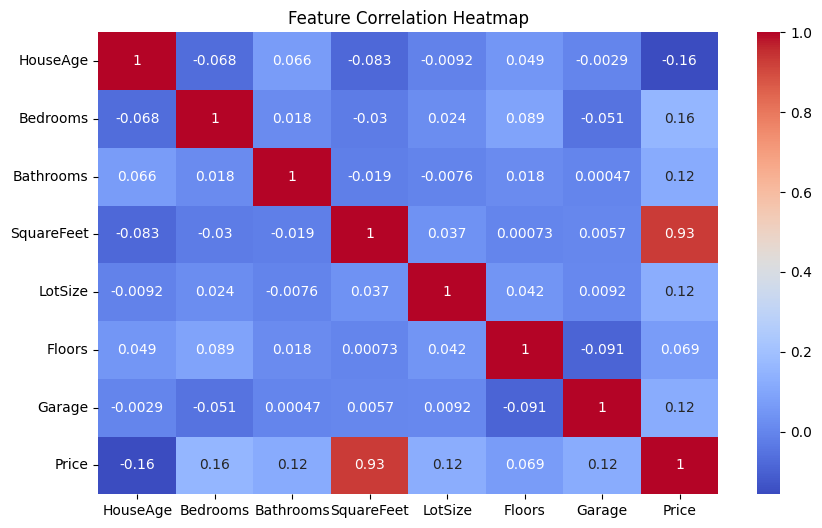

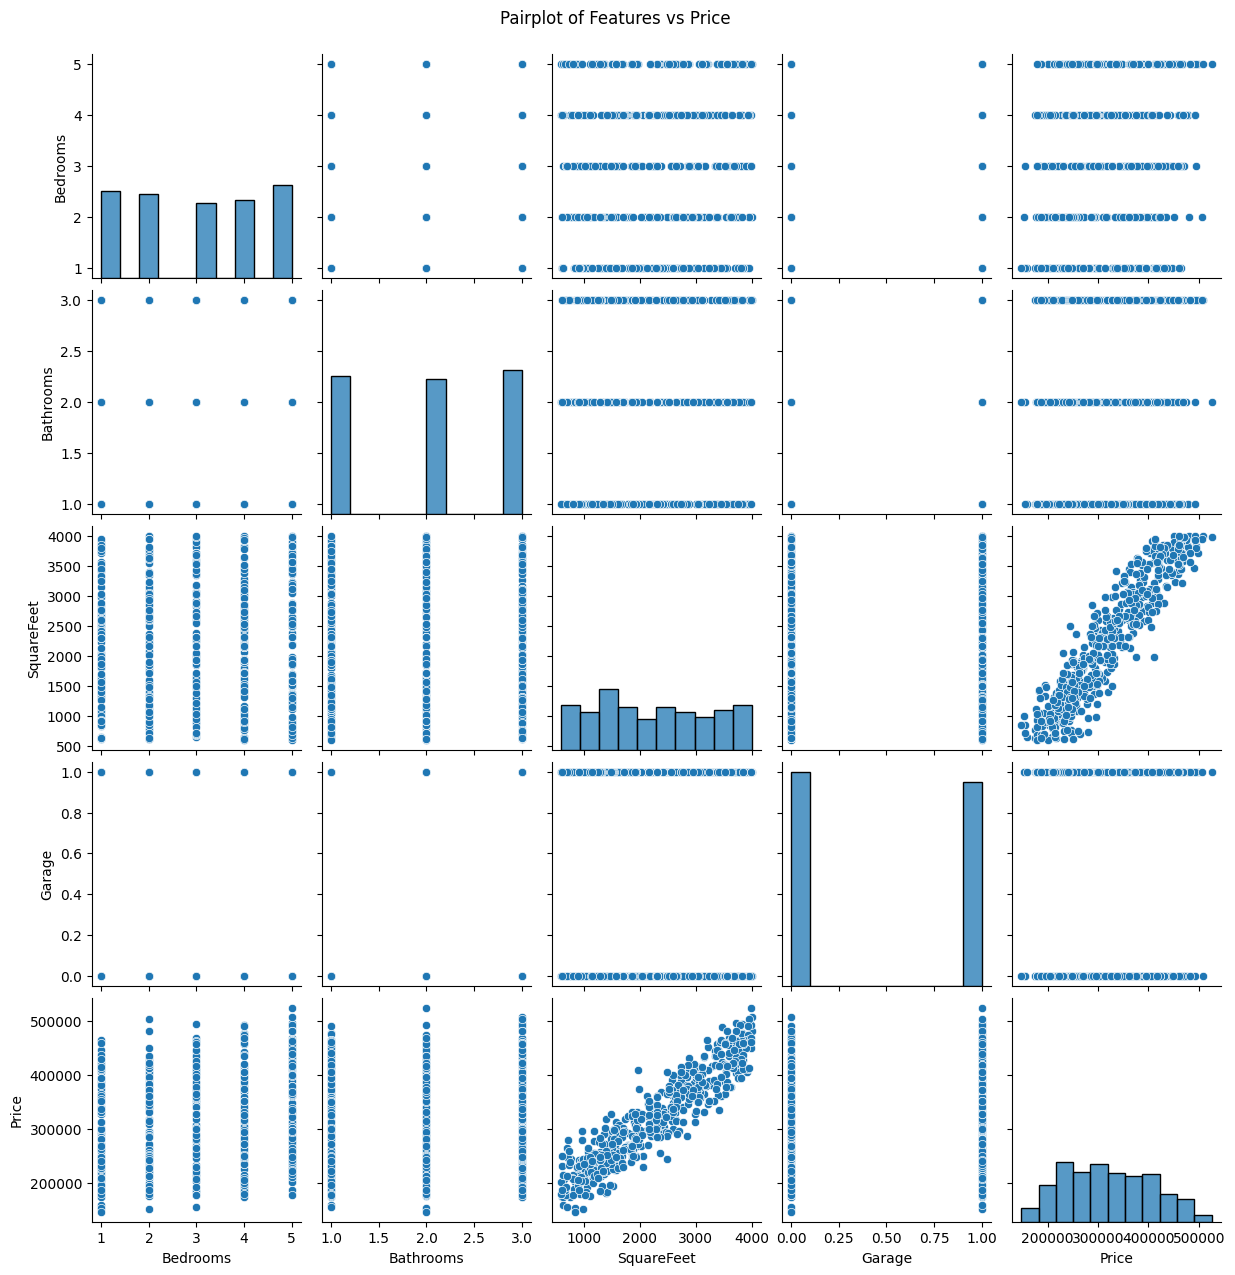

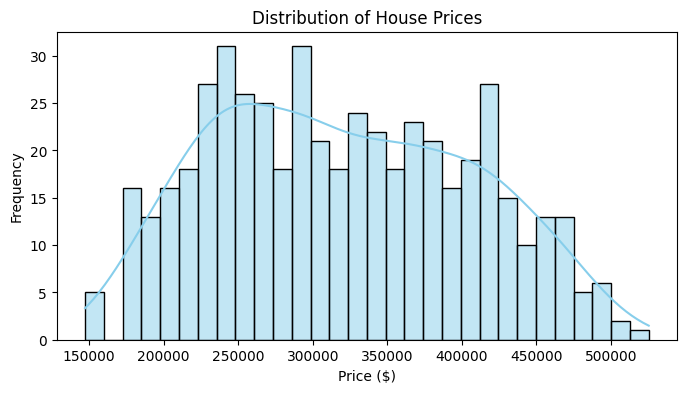

<ipython-input-2-70eacd6a2807>:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Bedrooms", y="Price", data=data, estimator=np.mean, ci=None)


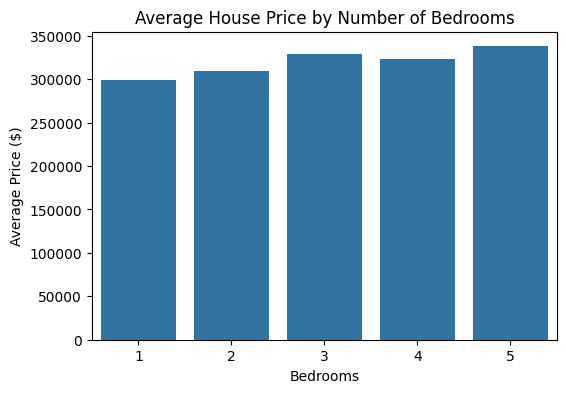


📉 Mean Squared Error: 479398671.750658
✅ R2 Score: 0.9379332940227022

📊 Model Coefficients:
      Feature   Coefficient
0    HouseAge   -209.266762
1    Bedrooms  10421.553815
2   Bathrooms  14208.357839
3  SquareFeet     80.047702
4     LotSize  26848.596263
5      Floors  10217.244144
6      Garage  19622.076604

📊 Model Accuracy Summary:
✅ R² Score: 0.9379 (explained variance)
📉 Mean Absolute Error (MAE): $17,447.10
📉 Mean Squared Error (MSE): $479,398,671.75
📉 Root Mean Squared Error (RMSE): $21,895.17

🏠 Please enter the house details below:
🏡 Enter the age of the house (in years): 4
🛏️ Enter the number of bedrooms: 2
🛁 Enter the number of bathrooms: 3
📐 Enter the square footage of the house: 1200
🌳 Enter the lot size (in acres): 1
🏠 Enter the number of floors (1 or 2): 2
🚗 Does the house have a garage? (1 = Yes, 0 = No): 1

🔮 Predicted House Price: $276,623.04


In [2]:
# 📌 House Price Prediction using Multiple Linear Regression + Visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    "HouseAge": np.random.randint(1, 100, 500),
    "Bedrooms": np.random.randint(1, 6, 500),
    "Bathrooms": np.random.randint(1, 4, 500),
    "SquareFeet": np.random.randint(600, 4000, 500),
    "LotSize": np.random.uniform(0.05, 1.0, 500),  # in acres
    "Floors": np.random.choice([1, 2], 500),
    "Garage": np.random.choice([0, 1], 500),
})

# Simulated price target
data["Price"] = (
    50000 +
    data["HouseAge"] * -250 +
    data["Bedrooms"] * 10000 +
    data["Bathrooms"] * 15000 +
    data["SquareFeet"] * 80 +
    data["LotSize"] * 30000 +
    data["Floors"] * 10000 +
    data["Garage"] * 20000 +
    np.random.normal(0, 20000, 500)
)

# 2. Show sample data
print("Sample Data:")
print(data.head())

# 3. 📊 Visualizations

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(data[["Bedrooms", "Bathrooms", "SquareFeet",  "Garage", "Price"]])
plt.suptitle("Pairplot of Features vs Price", y=1.02)
plt.show()

# Distribution of price
plt.figure(figsize=(8, 4))
sns.histplot(data["Price"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

# Barplot: Average price by number of bedrooms
plt.figure(figsize=(6, 4))
sns.barplot(x="Bedrooms", y="Price", data=data, estimator=np.mean, ci=None)
plt.title("Average House Price by Number of Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

# 4. Feature & Target
X = data.drop("Price", axis=1)
y = data["Price"]

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Evaluation
y_pred = model.predict(X_test)
print("\n📉 Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("✅ R2 Score:", r2_score(y_test, y_pred))

# 8. Coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\n📊 Model Coefficients:")
print(coef_df)
# 7. Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Accuracy Summary:")
print(f"✅ R² Score: {r2:.4f} (explained variance)")
print(f"📉 Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"📉 Mean Squared Error (MSE): ${mse:,.2f}")
print(f"📉 Root Mean Squared Error (RMSE): ${rmse:,.2f}")


# 9. User Input
print("\n🏠 Please enter the house details below:")

user_input = {
    "HouseAge": float(input("🏡 Enter the age of the house (in years): ")),
    "Bedrooms": float(input("🛏️ Enter the number of bedrooms: ")),
    "Bathrooms": float(input("🛁 Enter the number of bathrooms: ")),
    "SquareFeet": float(input("📐 Enter the square footage of the house: ")),
    "LotSize": float(input("🌳 Enter the lot size (in acres): ")),
    "Floors": float(input("🏠 Enter the number of floors (1 or 2): ")),
    "Garage": float(input("🚗 Does the house have a garage? (1 = Yes, 0 = No): "))
}

user_df = pd.DataFrame([user_input])
predicted_price = model.predict(user_df)[0]
print(f"\n🔮 Predicted House Price: ${predicted_price:,.2f}")
